<h1>Nearest Neighbors machine learning algorithm</h1>

In [1]:
import matplotlib.pyplot as plt
import random
from math import sqrt
D = 2  # number of dimensions

In [2]:
class Point:
    def __init__(self, arr, tof):
        self.coords = arr
        self.bool = tof  # tof = true of false

In [3]:
def euclidean_dist(D, p1, p2):
    sum = 0
    for i in range(D):
        sum += (p2.coords[i] - p1.coords[i]) ** 2
    return sqrt(sum)

<h2>Calculate distance from one point to all others</h2>

In [4]:
def distances(D, graph, new):
    dist = {}
    for i in range(len(graph)):
        dist[i] = euclidean_dist(D, graph[i], new)

    dist = sorted(dist.items(), key=lambda item: item[1])
    return dist

In [ ]:
def neighbors(distances, k):
    for i in range(k):
        return max(set(distances), key = distances.count)

In [5]:
x = []
y = []
for _ in range(100): 
    x.append(random.uniform(1,50))
    y.append(random.uniform(1,50))

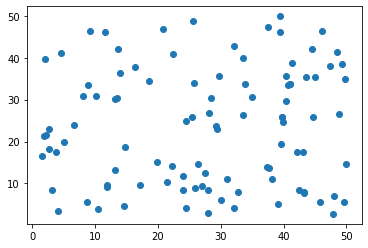

In [6]:
plt.scatter(x, y);